# Business Case:- Employee Attrition

#### Based on given features we need to find whether an employee will leave the company or not.

In [2]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
## Loading the data
data=pd.read_csv('HR-Employee-Attrition.csv')

## Basic Checks

In [5]:
data.head()#first five rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
## Getting all columns form the dataset
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
data.shape

(1470, 35)

In [8]:
data.head(pd.set_option('display.max_columns',None))#to diplay all columns from dataset


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [9]:
data.tail()#last five rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [10]:
data.describe()##used to view some basic statistical details like percentile, mean, std etc.

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
# we do not have any null values
# we have 2 constant features Employee count and standardhours

In [13]:
data.describe(include=['O'])#It will give you info about categorical data/columns

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [14]:
# No null values
# Over18 is constant feature.

In [15]:
data.info()#To check  data type and  null value of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Exploratory Data Analysis

In [17]:
# Task:- Perform Univariate and Bivariate analysis and get the insights from the data.

### continuous variables

In [19]:
data3=data[['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']]#continuous variables/columns

# Data Preprocessing

### <font color='red'> Handling missing values </font> 

In [22]:
data.isnull().sum()#null value checking
# no null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince


### <font color='red'> Handling Categorical features </font> 

In [24]:
## Categorical data conversion
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


###  1.Attrition

In [26]:
data.Attrition.unique()#checking unique value in Attrition column

array(['Yes', 'No'], dtype=object)

In [27]:
## Manual encoding Attrition feature
data.Attrition=data.Attrition.map({'Yes':1,'No':0})
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


###  2.BusinessTravel

In [29]:
data.BusinessTravel.unique()#checking unique value

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [30]:
## Encoding BusinessTravel, this feature told the worker who travelled frequenlty has quited the job so let do the
##manual encoding
data.BusinessTravel=data.BusinessTravel.map({'Travel_Frequently':2,'Travel_Rarely':1,'Non-Travel':0})


In [31]:
data.head()#checking whether imputation properly done or not

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### 3.Department

In [33]:
data.Department.unique()#unique values

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [34]:
data.Department=data.Department.map({'Research & Development':2,'Sales':1,'Human Resources':0})#imputation using map function

In [35]:
data.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5


### 4.EducationField

In [37]:
 data.EducationField.unique()#unique labels

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [38]:
#using map function
data.EducationField=data.EducationField.map({'Life Sciences':5,'Medical':4,'Marketing':3,'Technical Degree':2,'Other':1,'Human Resources':0 })

In [39]:
data.head()#checking for imputation

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,5,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,5,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,1,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,5,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,4,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### 5.Gender

In [41]:
data.Gender.value_counts()#checking weightage of each label whoever have high count

Gender
Male      882
Female    588
Name: count, dtype: int64

In [42]:
## Encoding Gender by one hot encoding.
# data.Gender=pd.get_dummies(data.Gender,drop_first=True)

In [43]:
df1 = pd.get_dummies(data['Gender'],dtype = 'int',prefix='Gender',drop_first=True)
data = pd.concat([data,df1],axis=1).drop('Gender',axis=1)

In [44]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male
0,41,1,1,1102,1,1,2,5,1,1,2,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0
1,49,0,2,279,2,8,1,5,1,2,3,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,1
2,37,1,1,1373,2,2,2,1,1,4,4,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,0,2,1392,2,3,4,5,1,5,4,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,0,1,591,2,2,1,4,1,7,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,2,23,2,4,1,2061,3,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3,1
1466,39,0,1,613,2,6,1,4,1,2062,4,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7,1
1467,27,0,1,155,2,4,3,5,1,2064,2,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3,1
1468,49,0,2,1023,1,2,3,4,1,2065,4,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8,1


In [45]:
data.head(2)  #checking whether imputation done or not

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male
0,41,1,1,1102,1,1,2,5,1,1,2,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0
1,49,0,2,279,2,8,1,5,1,2,3,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,1


### JobRole

In [47]:
data.JobRole.value_counts()#checking count for each label

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [48]:
## Frequency Encoding JobRole
data.JobRole=data.JobRole.map({'Laboratory Technician':6,'Sales Executive':8,'Research Scientist':7,'Sales Representative':2,
                              'Human Resources':0,'Manufacturing Director':5,'Healthcare Representative':4,'Manager':3,'Research Director':1 })

In [49]:
data #data.JobRole #checking whether imputation done or not


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male
0,41,1,1,1102,1,1,2,5,1,1,2,94,3,2,8,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0
1,49,0,2,279,2,8,1,5,1,2,3,61,2,2,7,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,1
2,37,1,1,1373,2,2,2,1,1,4,4,92,2,1,6,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,0,2,1392,2,3,4,5,1,5,4,56,3,1,7,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,0,1,591,2,2,1,4,1,7,1,40,3,1,6,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,2,23,2,4,1,2061,3,41,4,2,6,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3,1
1466,39,0,1,613,2,6,1,4,1,2062,4,42,2,3,4,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7,1
1467,27,0,1,155,2,4,3,5,1,2064,2,87,4,2,5,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3,1
1468,49,0,2,1023,1,2,3,4,1,2065,4,63,2,2,8,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8,1


### Encoding MaritalStatus using label encoding


In [51]:
data.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [52]:
## Encoding MaritalStatus

from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn

label = LabelEncoder()#object creation
data.MaritalStatus=label.fit_transform(data.MaritalStatus)#applying label encoder to  marital status

In [53]:
data.MaritalStatus.unique()

array([2, 1, 0])

### OverTime

In [55]:
data.OverTime.value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [56]:
## Encoding OverTime
data.OverTime=label.fit_transform(data.OverTime)#label encoding

In [57]:
data.head()#checking for imputation

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male
0,41,1,1,1102,1,1,2,5,1,1,2,94,3,2,8,4,2,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5,0
1,49,0,2,279,2,8,1,5,1,2,3,61,2,2,7,2,1,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7,1
2,37,1,1,1373,2,2,2,1,1,4,4,92,2,1,6,3,2,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,0,2,1392,2,3,4,5,1,5,4,56,3,1,7,3,1,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,0,1,591,2,2,1,4,1,7,1,40,3,1,6,2,1,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2,1


In [58]:
# Since we are using DT and DT is robust to outliers and doesnot require scaling.
# Only conversion of categorical data and missing values should be handled.

## Feature Selection

<Axes: >

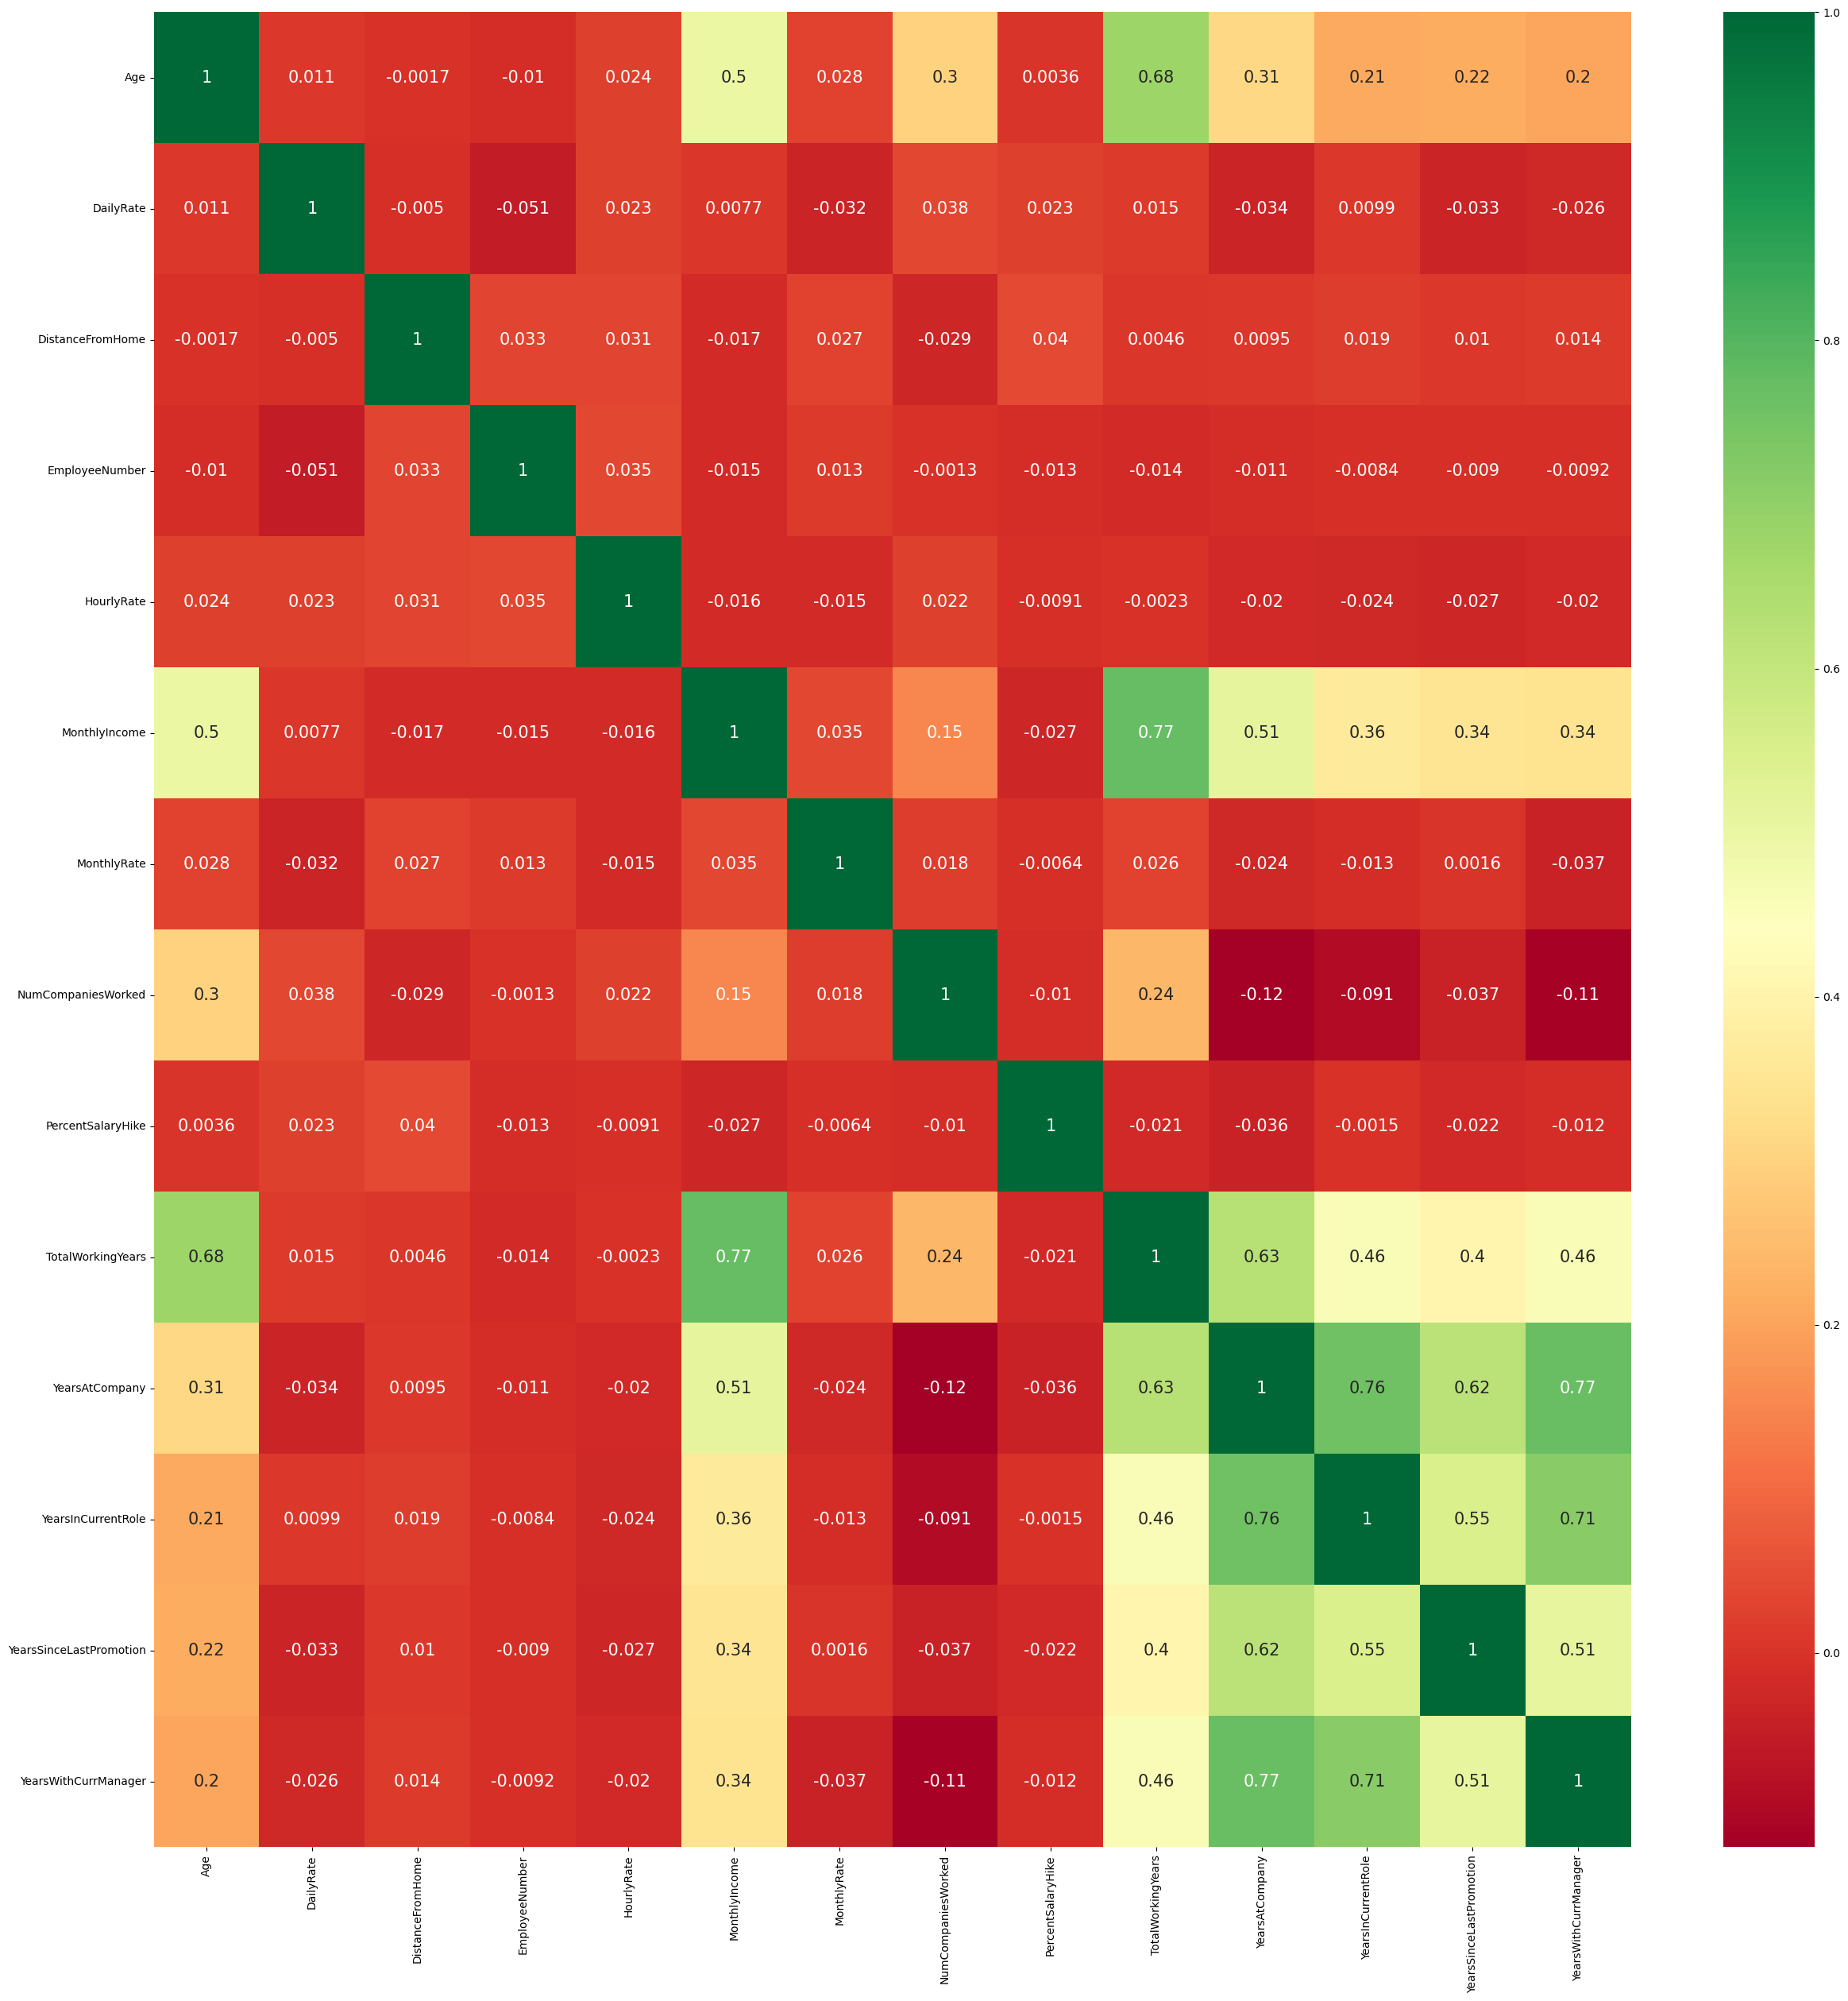

In [60]:
## Checking correlation

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(data3.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

In [61]:
## Removing constant features
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'YearsAtCompany', 'TotalWorkingYears'], axis="columns", inplace=True)#droping those columns which have std=0

In [62]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male
0,41,1,1,1102,1,1,2,5,2,94,3,2,8,4,2,5993,19479,8,1,11,3,1,0,0,1,4,0,5,0
1,49,0,2,279,2,8,1,5,3,61,2,2,7,2,1,5130,24907,1,0,23,4,4,1,3,3,7,1,7,1
2,37,1,1,1373,2,2,2,1,4,92,2,1,6,3,2,2090,2396,6,1,15,3,2,0,3,3,0,0,0,1
3,33,0,2,1392,2,3,4,5,4,56,3,1,7,3,1,2909,23159,1,1,11,3,3,0,3,3,7,3,0,0
4,27,0,1,591,2,2,1,4,1,40,3,1,6,2,1,3468,16632,9,0,12,3,4,1,3,3,2,2,2,1


## Model Creation

In [64]:
## Creating independent and dependent variable
X = data.drop('Attrition', axis=1)#independent variable
y = data.Attrition#dependent variable

In [65]:
## preparing training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [66]:
# Balance only the training data

In [67]:
y_train.value_counts()

Attrition
0    913
1    189
Name: count, dtype: int64

In [68]:
## Balacing the data
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print(Counter(y_train))# checking count for each class
X_sm,y_sm=sm.fit_resample(X_train,y_train) #applying sampling on target variable
print(Counter(y_sm)) # checking count after sampling for  each class

Counter({0: 913, 1: 189})
Counter({0: 913, 1: 913})



### <font color='red'> Decision Tree </font> 

In [70]:
from sklearn.tree import DecisionTreeClassifier #importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()  #object creation for decision tree
dt.fit(X_sm,y_sm)  #training the model
y_hat=dt.predict(X_test)  #prediction
y_hat   #predicted values

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [71]:
y_train_predict=dt.predict(X_sm)#predicting training data to check training performance
#y_train_predict

In [72]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
##Training score

acc_train=accuracy_score(y_sm,y_train_predict)#checking accuracy
acc_train
# overfit model

1.0

In [73]:
print(classification_report(y_sm,y_train_predict))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       913
           1       1.00      1.00      1.00       913

    accuracy                           1.00      1826
   macro avg       1.00      1.00      1.00      1826
weighted avg       1.00      1.00      1.00      1826



In [74]:
## test acc
test_acc=accuracy_score(y_test,y_hat)#testing accuracy
test_acc

0.7391304347826086

In [75]:
## test score
test_f1=f1_score(y_test,y_hat)#f1 score
test_f1

0.22580645161290322

In [76]:
print(classification_report(y_test,y_hat))# for  testing

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       320
           1       0.18      0.29      0.23        48

    accuracy                           0.74       368
   macro avg       0.53      0.55      0.53       368
weighted avg       0.79      0.74      0.76       368



In [77]:
pd.crosstab(y_test,y_hat)# confusion matrix for

col_0,0,1
Attrition,,
0,258,62
1,34,14


In [78]:
from sklearn.model_selection import cross_val_score
scores_after = cross_val_score(dt,X,y,cv=3,scoring='f1')
print(scores_after)

print("Cross validation Score:",scores_after.mean())
print("Std :",scores_after.std())
#std of < 0.05 is good.

[0.34437086 0.42236025 0.24161074]
Cross validation Score: 0.3361139492097969
Std : 0.074021297845096


## Hyperparameters of DecisionTree
* Hyperparameter tuning is searching the hyperparameter space for a set of values that will optimize your model architecture.


* Criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.


* Splitter: This is how the decision tree searches the features for a split. The default value is set to “best”. That is, for each node, the algorithm considers all the features and chooses the best split. If you decide to set the splitter parameter to “random,” then a random subset of features will be considered.



* max_depth: This determines the maximum depth of the tree.  we use a depth of two to make our decision tree. ... This will often result in over-fitted decision trees. The depth parameter is one of the ways in which we can regularize the tree, or limit the way it grows to prevent over-fitting..The tree perfectly fits the training data and fails to generalize on testing data.



* min_samples_split:Ideal range is 1 to 40.min_samples_split specifies the minimum number of samples required to split an internal node, while min_samples_leaf specifies the minimum number of samples required to be at a leaf node.



* min_samples_leaf: The minimum number of samples required to be at a leaf node.Similarr to min sample split ,this describes the minimum number of samples at the leaf,the base of tree.Ideal range is 1 to 20.(thershold value to make a decision)like 40


In [81]:
from sklearn.model_selection import GridSearchCV
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set.
#So,in the end, you can select the best parameters from the listed hyperparameters.

In [82]:

#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods




tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters
print(f"Best paramters: {best_params})")#printing  best parameters



Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 14, 'min_samples_split': 2, 'splitter': 'random'})


In [83]:
#fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Bestparamters: ({'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'random'})

In [84]:
tree_cv.best_params_#getting best parameters from cv

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 14,
 'min_samples_split': 2,
 'splitter': 'random'}

In [85]:
tree_cv.best_score_#getting best score form cv

0.4773145408081336

In [86]:
# create a new model with the optimal values
dt1=DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf= 10,min_samples_split=2,splitter='random')#passing best parameter to decision tree

In [87]:
dt1.fit(X_sm,y_sm)#traing model with best parameter

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, splitter='random')

In [88]:
y_hat1=dt1.predict(X_test)#predicting
#y_hat1

In [89]:
acc_test=accuracy_score(y_test,y_hat1)#checking accuracy
acc_test

0.8070652173913043

In [90]:
test_f1=f1_score(y_test,y_hat1)#f1_score
test_f1

0.40336134453781514

In [91]:
print(classification_report(y_test,y_hat1))#it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       320
           1       0.34      0.50      0.40        48

    accuracy                           0.81       368
   macro avg       0.63      0.68      0.64       368
weighted avg       0.84      0.81      0.82       368



In [92]:
# Training score
y_pre_hat1=dt1.predict(X_sm)

print("Accuracy_score: ",accuracy_score(y_sm,y_pre_hat1))

print("F1_score: ", f1_score(y_sm,y_pre_hat1))

Accuracy_score:  0.8636363636363636
F1_score:  0.8646003262642741


In [93]:
# Overfit model


### <font color='red'> Random Forest  </font> 

In [95]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest
rf_clf.fit(X_sm,y_sm)#training the data

RandomForestClassifier()

In [96]:
y_predict=rf_clf.predict(X_test)#testing

In [97]:
y_pred1=rf_clf.predict(X_sm) # training

In [98]:
# Testing score:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print("Accuracy: ", accuracy_score(y_test,y_predict))
print("F1_score: ", f1_score(y_test,y_predict))

Accuracy:  0.8478260869565217
F1_score:  0.3333333333333333


In [99]:
# Training score:

print("Accuracy: ", accuracy_score(y_sm,y_pred1))
print("F1_score: ", f1_score(y_sm,y_pred1))

Accuracy:  1.0
F1_score:  1.0


## Hyperparameter Tuning

* n_estimators = number of trees in the foreset

* max_features =These are the maximum number of features Random Forest is allowed to try in individual tree. There are multiple options available in Python to assign maximum features

* max_depth =The depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information              about the data

* min_samples_split =the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node

* min_samples_leaf = minimum number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [102]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=1, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rf_cv.fit(X_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters
print(f"Best paramters: {rf_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False})


In [103]:
#rf_clf2 = RandomForestClassifier(rf_best_params)#passing best parameter to randomforest
rf_clf2 = RandomForestClassifier(n_estimators= 600, min_samples_split= 5, min_samples_leaf= 1, 
                                 max_features= 'sqrt', max_depth= 60)
rf_clf2.fit(X_sm, y_sm)#training

y_predict=rf_clf2.predict(X_test)#testing
print("F1_score: ", f1_score(y_test,y_predict)) #checking performance

F1_score:  0.34146341463414637


In [104]:
# training score:

y_pre1=rf_clf2.predict(X_sm)
print("F1_score: ", f1_score(y_sm,y_pre1)) 

F1_score:  1.0


### <font color='red'> Bagging </font> 

In [106]:
from sklearn.neighbors import KNeighborsClassifier#USING KNN
KNN1=KNeighborsClassifier() ## model object creation
KNN1.fit(X_sm,y_sm)  ## fitting the model
y_hat_knn=KNN1.predict(X_test) ## getting the predict from created model

In [107]:
accuracy_score(y_test,y_hat_knn)

0.6358695652173914

In [108]:
f1_score(y_test,y_hat_knn)

0.20238095238095238

In [109]:
from sklearn.ensemble import BaggingClassifier #import bagging 

## model object creation
model_bagg1=BaggingClassifier(estimator=KNN1,n_estimators=500, max_samples=0.5, max_features=0.75) 

# base_estimator---> algorithm which you want to pass
# n_estimators-----> number of base learners


## fitting the model
model_bagg1.fit(X_sm,y_sm) 

## getting the prediction
y_hat_bagg=model_bagg1.predict(X_test) 

# testing score:
f1_score(y_test,y_hat_bagg) 

0.20118343195266272

In [110]:
#Training score:
y_pr = model_bagg1.predict(X_sm)    
f1_score(y_sm,y_pr) 

0.8491902834008097

# Boosting


### <font color='red'> Gradient Boosting </font> 

In [113]:
## importing the model library
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(X_sm,y_sm) ## fitting the data
y_gbm=gbm.predict(X_test)#predicting the price

#testing score:
#from sklearn.metrics import f1_score
f1_score(y_test,y_gbm) 

0.4842105263157895

In [114]:
# training score:
y_pre_g=gbm.predict(X_sm)
f1_score(y_sm,y_pre_g) 

0.9559471365638766


### <font color='red'> XGBoost </font> 

In [116]:

## model creation
#importing the model library
from xgboost import XGBClassifier

xgb_r= XGBClassifier() ## object creation
xgb_r.fit(X_train, y_train)# fitting the data
y_hat=xgb_r.predict(X_test)#predicting the price

# testing score:
f1_score(y_test,y_hat) 

0.3380281690140845

In [117]:
# training score:
y_h=xgb_r.predict(X_train)
f1_score(y_train,y_h) 

1.0

In [118]:
from sklearn.model_selection import GridSearchCV
# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
}

# Create XGBoost classifier
xgb_model = XGBClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='f1', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters: {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 300}


In [119]:
xg = XGBClassifier(gamma= 0.1, learning_rate= 0.1, max_depth=5, min_child_weight=5, n_estimators=300)
xg.fit(X_sm, y_sm)
y_hat4 = xg.predict(X_test)

#testing score:
f1_score(y_test, y_hat4)

0.35294117647058826

In [120]:
# training score:

y_pre_x = xg.predict(X_sm)

f1_score(y_sm, y_pre_x)

1.0